In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
####Sample data for testing

data = {
    'text': [
        'Opt for an all-round family’s security. Check now!',
        ',Check Your Eligibility for a 1 million dollar Term Plan!',
        'Claim Your Lifetime Free Credit Cards with XYZ Bank',
        'Please update your security settings immediately by clicking this link.',
        'Article Review Request: Title: "Ensuring Security and Privacy through Advanced AI"',
        'Alert: Unusual sign-in attempt detected. Verify your account now.',
        'Security alert: Review your account activity immediately.',
        'Payment declined. Click here to confirm your bank details.',
        'Looking forward to our lunch meeting tomorrow!',
        'Let’s connect on the project updates today.',
        'Please let me know your availability for a call.'
    ],
    'label': ['malicious', 'malicious', 'benign', 'malicious', 'benign', 'malicious', 'malicious', 'malicious', 'benign', 'benign', 'benign']
}

In [3]:
###Function for preparing the data

def prepare_data(data):
    # Convert data to DataFrame
    df = pd.DataFrame(data)

    # Encode labels to numerical values
    label_encoder = LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])  # 'malicious'=1, 'benign'=0

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, label_encoder

In [4]:
# write a function to create and train the model

def train_model(X_train, y_train, model):

    # Define a pipeline with TfidfVectorizer and the specified model
    #transform a collection of text into a matrix of numerical features based on the importance of each word in a document or database of documents
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),  # Text feature extraction ##convert raw text data into numerical form
        #stop_words: remove common English stop words such as "the," "is," "and," etc. before calculating the TF-IDF score
        #maximum document frequency threshold max_df = words appearing in more than 70% of the documents will be ignored
        ('classifier', model)  # Specific model
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    return pipeline

In [5]:
# Function to evaluate the model
def evaluate_model(pipeline, X_test, y_test, model_name):
    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate performance
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    # Plot confusion matrix
    plot_confusion_matrix(confusion_matrix(y_test, y_pred), model_name)

In [6]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['benign', 'malicious'], yticklabels=['benign', 'malicious'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


Logistic Regression Performance:
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



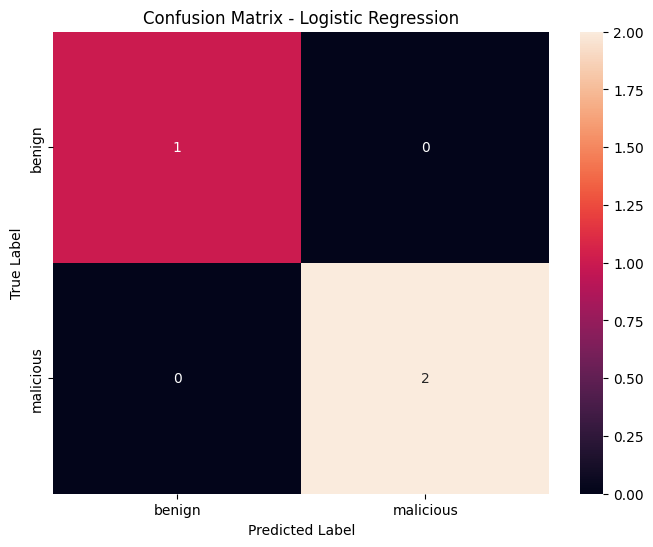


Random Forest Classifier Performance:
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



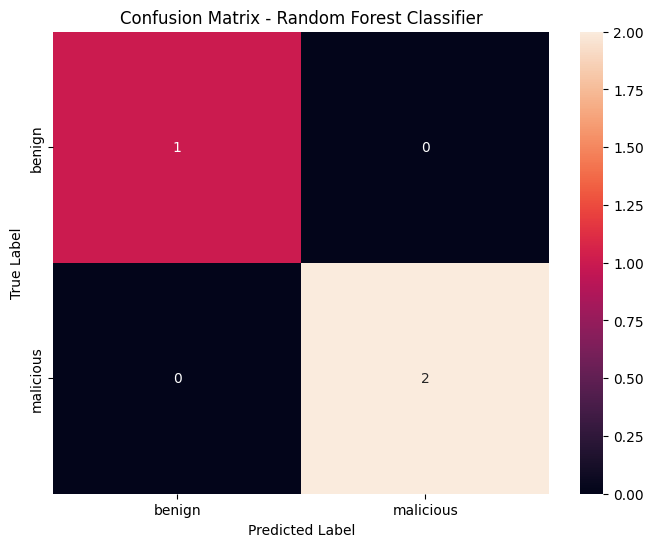


Logistic Regression Predictions:
Benign Sample Prediction: ['benign']
Malicious Sample Prediction: ['malicious']

Random Forest Predictions:
Benign Sample Prediction: ['benign']
Malicious Sample Prediction: ['malicious']


In [7]:
def main():
# Call Prepare data function
    X_train, X_test, y_train, y_test, label_encoder = prepare_data(data)

    # Train Logistic Regression model
    logistic_model = LogisticRegression(solver='liblinear', random_state=42)
    logistic_pipeline = train_model(X_train, y_train, logistic_model)

    # Train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_pipeline = train_model(X_train, y_train, rf_model)

    # Evaluate Logistic Regression
    evaluate_model(logistic_pipeline, X_test, y_test, "Logistic Regression")

    # Evaluate Random Forest
    evaluate_model(rf_pipeline, X_test, y_test, "Random Forest Classifier")

    # Example usage of the models

    # Benign and malicious sample messages
    benign_sample = "Good morning! Just checking in to see how you are doing."
    malicious_sample = "Urgent: Your account has been compromised, please click this link to reset your password."

    # Predict with Logistic Regression
    logistic_benign_pred = logistic_pipeline.predict([benign_sample])
    logistic_malicious_pred = logistic_pipeline.predict([malicious_sample])

    # Predict with Random Forest
    rf_benign_pred = rf_pipeline.predict([benign_sample])
    rf_malicious_pred = rf_pipeline.predict([malicious_sample])

    # Display predictions
    print("\nLogistic Regression Predictions:")
    print("Benign Sample Prediction:", label_encoder.inverse_transform(logistic_benign_pred))
    print("Malicious Sample Prediction:", label_encoder.inverse_transform(logistic_malicious_pred))

    print("\nRandom Forest Predictions:")
    print("Benign Sample Prediction:", label_encoder.inverse_transform(rf_benign_pred))
    print("Malicious Sample Prediction:", label_encoder.inverse_transform(rf_malicious_pred))

main()